In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import statistics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [4]:
data_credit_card = pd.read_csv("Default_Credit_Card.csv")

In [ ]:
'''
#################################################################################################
############################# Data Exploration/Cleaning/Preparation #############################
#################################################################################################
'''

In [11]:
####################################### Describe the data #######################################

In [12]:
data_credit_card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [13]:
col_data = list(data_credit_card.columns)

In [14]:
data_credit_card.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffbf16582e0>,
      dtype=object)

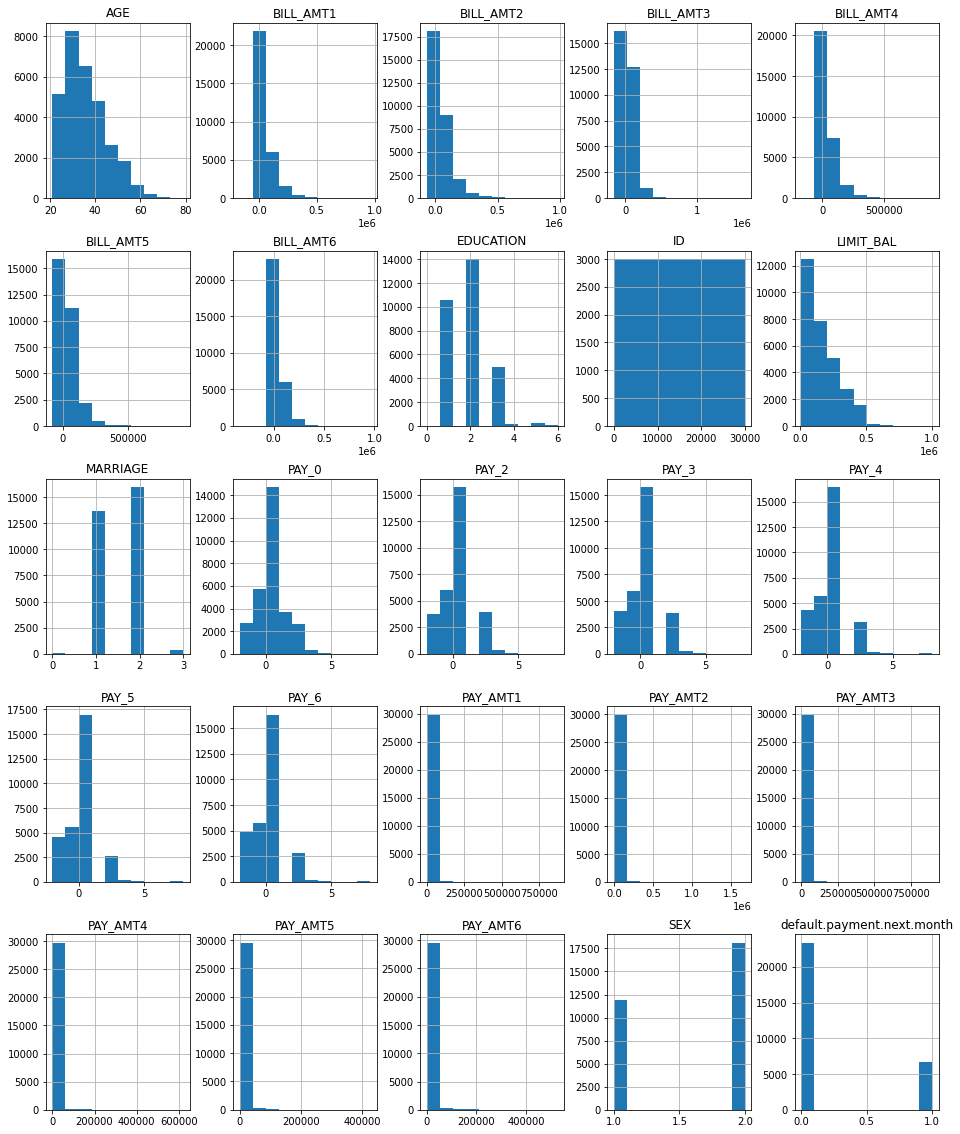

In [15]:
data_credit_card.hist(figsize=(16,20))

In [16]:
####################################### Handle Missing Data #####################################

In [18]:
## to cehck if any column has na values 
data_credit_card.isna().any()
#or
#data_credit_card.isna().values.any()

ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default.payment.next.month    False
dtype: bool

In [19]:
## to check if any column has null values
data_credit_card.isnull().any()
#or
#data_credit_card.isnull().values.any()

ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default.payment.next.month    False
dtype: bool

In [ ]:
######## If there were any nulls/na, then how would we fix it ? ######## 

In [20]:
# Method 1 :- Drop them
data_credit_card = data_credit_card.dropna()

In [ ]:
# Method 2:- Fill na

In [ ]:
  #2.1   Fill the column having na with "average" value of that column
for name in data_credit_card.columns:
    if str(data_credit_card[name].dtype) != 'object':
        data_credit_card[name] = data_credit_card[name].fillna(int(data_credit_card[name].mean()))

In [ ]:
#or#

In [ ]:
#2.2   Fill with "0" 
for name in data_credit_card.columns:
    data_credit_card.loc[data_credit_card[name].isnull(),name]= 0
    data_credit_card.loc[data_credit_card[name].isna(),name]= 0

In [ ]:
# Method 3:- Use ML to solve ML
# Making other variables as Xs and the one with na/null as Y, we can use regression/classification model to fill the nas/nulls

In [24]:
##################################### Categorical vs Continous ###################################

In [ ]:
# Store continous and categorical features separately as categorical features are not required to be handled for treatment (outlier, redundancy etc.)

In [27]:
# Method 1:-  if the dtypes are already defined as categorical
cat_col = []
cont_col = []
for col in col_data:
    if str(data_credit_card[col].dtype) == 'category':
        cat_col.append(col)

In [28]:
# Mehthod 2:- Manual checking - Here I have assumed that if a column has more than 15 distincts values, then it is a continous else categorical
for col in col_data:
    if (len(data_credit_card[col].value_counts())) < 15 : 
        cat_col.append(col)
    else:
         cont_col.append(col)

In [32]:
# Categorical
cat_col

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'default.payment.next.month']

In [30]:
# Continous
cont_col

['ID',
 'LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [33]:
# Print the value count to confirm if the columns in cat_col are categorical    
[print(data_credit_card[col].value_counts()) for col in cat_col]  

2    18112
1    11888
Name: SEX, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: in

[None, None, None, None, None, None, None, None, None, None]

In [34]:
# removed the target variable form categorical feature list
cat_col.remove("default.payment.next.month") 

In [35]:
## Now all the categorical data will be treated using one-hot encoding, and side-by-side actual categorical columns wll be dropped:
dummy = pd.DataFrame()
for name in cat_col:
    dummy = pd.get_dummies(data_credit_card[name],prefix=name)  
    dummy = dummy.astype('category',copy=False)
    data_credit_card = pd.concat([data_credit_card,dummy], axis=1)
    data_credit_card = data_credit_card.drop([name], axis=1)

In [36]:
data_credit_card

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,2,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,3,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,...,0,0,1,0,0,0,0,0,0,0
3,4,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,...,0,0,1,0,0,0,0,0,0,0
4,5,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,39,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,...,0,0,1,0,0,0,0,0,0,0
29996,29997,150000.0,43,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,...,0,0,1,0,0,0,0,0,0,0
29997,29998,30000.0,37,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,...,0,0,1,0,0,0,0,0,0,0
29998,29999,80000.0,41,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
####################################### Eliminating redundant feature set ######################################### 

In [37]:
# remove id 
cont_col.remove("ID")
data_credit_card.drop(['ID'],inplace=True,axis=1)

In [39]:
########  1 :- Zero Variance Treatment
zero_var_name = []
for name in cont_col:
        try:
            if np.var(data_credit_card[name]) == 0:
                zero_var_name.append(name)
        except:
             continue

In [41]:
zero_var_name

[]

In [40]:
cont_col = list(set(cont_col)   - set(zero_var_name))

In [42]:
######## 2 :- Correlation
mycorr = data_credit_card[cont_col].corr(method = 'pearson').abs()

upper = mycorr.where(np.triu(np.ones(mycorr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column]>.99)]

In [44]:
mycorr

,PAY_AMT2,BILL_AMT1,PAY_AMT6,BILL_AMT4,BILL_AMT6,AGE,LIMIT_BAL,PAY_AMT3,BILL_AMT2,BILL_AMT5,PAY_AMT1,BILL_AMT3,PAY_AMT4,PAY_AMT5
PAY_AMT2,1.000000,0.099355,0.157634,0.207564,0.172663,0.021785,0.178408,0.244770,0.100851,0.181246,0.285576,0.316936,0.180107,0.180908
BILL_AMT1,0.099355,1.000000,0.179341,0.860272,0.802650,0.056239,0.285430,0.156887,0.951484,0.829779,0.140277,0.892279,0.158303,0.167026
PAY_AMT6,0.157634,0.179341,1.000000,0.177637,0.115494,0.019478,0.219595,0.162740,0.174256,0.164184,0.185735,0.182326,0.157834,0.154896
BILL_AMT4,0.207564,0.860272,0.177637,1.000000,0.900941,0.051353,0.293988,0.300023,0.892482,0.940134,0.233012,0.923969,0.130191,0.160433
BILL_AMT6,0.172663,0.802650,0.115494,0.900941,1.000000,0.047613,0.290389,0.233770,0.831594,0.946197,0.199965,0.853320,0.250237,0.307729
AGE,0.021785,0.056239,0.019478,0.051353,0.047613,1.000000,0.144713,0.029247,0.054283,0.049345,0.026147,0.053710,0.021379,0.022850
LIMIT_BAL,0.178408,0.285430,0.219595,0.293988,0.290389,0.144713,1.000000,0.210167,0.278314,0.295562,0.195236,0.283236,0.203242,0.217202
PAY_AMT3,0.244770,0.156887,0.162740,0.300023,0.233770,0.029247,0.210167,1.000000,0.150718,0.252305,0.252191,0.130011,0.216325,0.159214
BILL_AMT2,0.100851,0.951484,0.174256,0.892482,0.831594,0.054283,0.278314,0.150718,1.000000,0.859778,0.280365,0.928326,0.147398,0.157957
BILL_AMT5,0.181246,0.829779,0.164184,0.940134,0.946197,0.049345,0.295562,0.252305,0.859778,1.000000,0.217031,0.883910,0.293118,0.141574


In [45]:
upper

,PAY_AMT2,BILL_AMT1,PAY_AMT6,BILL_AMT4,BILL_AMT6,AGE,LIMIT_BAL,PAY_AMT3,BILL_AMT2,BILL_AMT5,PAY_AMT1,BILL_AMT3,PAY_AMT4,PAY_AMT5
PAY_AMT2,NaN,0.099355,0.157634,0.207564,0.172663,0.021785,0.178408,0.244770,0.100851,0.181246,0.285576,0.316936,0.180107,0.180908
BILL_AMT1,NaN,NaN,0.179341,0.860272,0.802650,0.056239,0.285430,0.156887,0.951484,0.829779,0.140277,0.892279,0.158303,0.167026
PAY_AMT6,NaN,NaN,NaN,0.177637,0.115494,0.019478,0.219595,0.162740,0.174256,0.164184,0.185735,0.182326,0.157834,0.154896
BILL_AMT4,NaN,NaN,NaN,NaN,0.900941,0.051353,0.293988,0.300023,0.892482,0.940134,0.233012,0.923969,0.130191,0.160433
BILL_AMT6,NaN,NaN,NaN,NaN,NaN,0.047613,0.290389,0.233770,0.831594,0.946197,0.199965,0.853320,0.250237,0.307729
AGE,NaN,NaN,NaN,NaN,NaN,NaN,0.144713,0.029247,0.054283,0.049345,0.026147,0.053710,0.021379,0.022850
LIMIT_BAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.210167,0.278314,0.295562,0.195236,0.283236,0.203242,0.217202
PAY_AMT3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.150718,0.252305,0.252191,0.130011,0.216325,0.159214
BILL_AMT2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.859778,0.280365,0.928326,0.147398,0.157957
BILL_AMT5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.217031,0.883910,0.293118,0.141574


In [46]:
to_drop

[]

In [47]:
cont_col = list(set(cont_col) - set(to_drop))

In [ ]:
####################################### Handle Outliers/ Data Normalization #########################################

In [58]:
# Normalizing the continous features (didn't use scaler as direction of the data matters here.)
data_credit_card[cont_col] = pd.DataFrame(preprocessing.normalize( data_credit_card[cont_col]), columns = [cont_col])

In [59]:
data_credit_card

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,0.969135,0.001163,0.189611,0.150313,0.033387,0.000000,0.000000,0.000000,0.000000,0.033387,...,1,0,0,0,0,0,0,0,0,0
1,0.998005,0.000216,0.022305,0.014346,0.022305,0.027212,0.028734,0.027121,0.000000,0.008317,...,0,0,0,1,0,0,0,0,0,0
2,0.898265,0.000339,0.291826,0.140000,0.135329,0.143034,0.149192,0.155190,0.015151,0.014971,...,0,0,1,0,0,0,0,0,0,0
3,0.456620,0.000338,0.429132,0.440483,0.450145,0.258575,0.264465,0.269835,0.018265,0.018438,...,0,0,1,0,0,0,0,0,0,0
4,0.615783,0.000702,0.106124,0.069830,0.441331,0.257890,0.235795,0.235611,0.024631,0.451750,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.527102,0.000093,0.452704,0.461969,0.499225,0.210850,0.074841,0.038287,0.020365,0.047918,...,0,0,1,0,0,0,0,0,0,0
29996,0.995086,0.000285,0.011165,0.012127,0.023232,0.059566,0.034430,0.000000,0.012186,0.023391,...,0,0,1,0,0,0,0,0,0,0
29997,0.579389,0.000715,0.068851,0.064814,0.053265,0.403216,0.397499,0.373841,0.000000,0.000000,...,0,0,1,0,0,0,0,0,0,0
29998,0.434543,0.000223,-0.008935,0.425738,0.414467,0.286657,0.064394,0.265853,0.466590,0.018517,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
''' since normalizatiom is sensitive to outlier, we will omit the outlier treatment as of now. 
    If any wants to do then,the he/she can dot it by eliminating the datapoints which are beyond -3 sigma to +3 sigma
'''

In [ ]:
#################################################################################################
############################################ Modeling ###########################################
#################################################################################################

In [49]:
# rename the target variable
data_credit_card.rename(columns = {'default.payment.next.month':'target'}, inplace = True)

In [50]:
x = data_credit_card.loc[:,(data_credit_card.columns != 'target')]
y = data_credit_card.loc[:,data_credit_card.columns == 'target']

In [ ]:
####################################### Train-Test Split #########################################  

In [105]:
# test size has been taken as 10%, feel free to alter it
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = .10, stratify = y)

In [106]:
# reindexing the train and test data
x_train.index = range(len(x_train))
y_train.index = range(len(x_train))
x_test.index  = range(len(x_test))
y_test.index  = range(len(y_test))

In [107]:
##################################### Logistic Regression ########################################

In [114]:
lr = LogisticRegression(penalty='l1',class_weight = 'balanced', 
                                  solver='liblinear', max_iter=100,multi_class='auto',
                                  C=.01,random_state=123 )

In [120]:
lr_model = lr.fit(x_train,y_train.values.ravel())
y_pred_prob_df = pd.DataFrame(lr_model.predict_proba(x_test)[:,1])
y_pred_value_df = pd.DataFrame(lr_model.predict(x_test)) ## this assumes prob > .5 as 1 and 0 otherwise
pred_lr_df = pd.concat([y_test,y_pred_prob_df],axis=1)
pred_lr_df.rename(columns={'target':'actual',0:'p1'}, inplace = True)

In [121]:
pred_lr_df

,actual,p1
0,0,0.339071
1,0,0.351236
2,0,0.882941
3,0,0.351299
4,0,0.299318
...,...,...
2995,0,0.312485
2996,0,0.351832
2997,1,0.911265
2998,0,0.385900


In [117]:
##################################### Model Evaluation ########################################

In [122]:
# Area under the curve
model_auc = round(roc_auc_score(y_test,y_pred_prob_df),3)

In [123]:
model_auc

0.761

In [113]:
## Confusion Matrix
confusion_matrix(y_test,y_pred_value_df)

array([[1997,  339],
       [ 289,  375]])

In [126]:
## Lift
lr=pred_lr_df.sort_values(by =['p1'], ascending = False)

actual=sum(lr['actual'])
count_total = len(lr)
percent = actual/count_total
        
lift_lr,percentile_array=[],[]
[percentile_array.append(int(round(np.percentile(lr.index.values,i)))) for i in range(2,101,2)]
[lift_lr.append(round(sum(lr['actual'][0:percentile_array[i]])/(percentile_array[i]*percent),2)) for i in range(0,50)]

## Making a dataframe from a dictionary of lists
lift=pd.DataFrame({ 
             'Logistic_Regression': lift_lr,
         'percentile value':percentile_array,
         'percentile' : np.arange(1,51,1)
                 })     
           

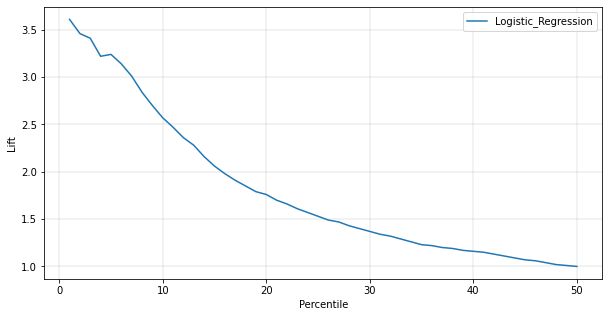

In [128]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('Percentile')
ax.set_ylabel('Lift')
ax.plot(lift['percentile'],lift['Logistic_Regression'],label='Logistic_Regression')
ax.grid(color='grey', linestyle='-', linewidth=0.40, alpha=0.5)
ax.legend()                

In [ ]:
''' 
There are techniques to improvise the hyperparameters, and so the model's efficiency, and those techniques
has been discussed later in this repo and ML webiste's blogs.
'''